In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,Bidirectional
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import sys
import os
import tsgm
# Obtener la ruta del directorio actual
current_dir = os.getcwd()

# Construir la ruta relativa al directorio que quieres agregar
relative_dir = os.path.join(current_dir, 'mis_pkgs/')

# Agregar la ruta relativa al sys.path
sys.path.insert(0, relative_dir)

from MIOPATIA_db import DB_management as db 


2024-03-05 17:48:41.446115: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-05 17:48:41.446175: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-05 17:48:41.448099: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-05 17:48:41.459813: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-05 17:48:42.888659: W tensorflow/comp

Voy a quedarme con los 62 atunes con su última medida

In [2]:
filename = "hdf_28_06_atunes_agilent_clasificados.hdf"
with pd.HDFStore(filename,complib="zlib",complevel=4) as hdf_db:
    pre_p_e1  = hdf_db.get('data/pollos_estado')
    # p_e =pre_p_e1.drop_duplicates(subset = ['Pollo', 'Medida'],  keep = 'last').reset_index(drop = True)
    t    = hdf_db.get('data/tabla')
    X_train=np.zeros((pre_p_e1.shape[0],401,8))
    y_train=np.zeros((pre_p_e1.shape[0],1))
    x=0
    for index, row in pre_p_e1.iterrows():   # El primer registro no se toma en cuenta porque es basura
        Primero = int(row['Primero'])
        Ultimo  = int(row['Ultimo'])
        estado  = int(row['Estado'])
        print(Primero)
        print(Ultimo)
        print(estado)
        if estado == 0 or estado== 1:
            target = 1
        else:
            target = 0
        pepito=np.array(t.iloc[Primero:Ultimo+1])
        # #print(pepito.shape)
        X_train[x]=pepito[:,3:11]
        print(X_train[x][0:4,:])       
        y_train[x]=target
        x=x+1


print(X_train.shape)
print(y_train.shape)
#print(X_train[0:4,:,:])

0
400
0
[[ 2.11548583e+05 -2.41023444e-01  4.48948241e+03  1.82646509e+04
   1.88083206e+04 -1.32977288e+00  2.05433600e+05 -5.04959300e+04]
 [ 2.00995358e+05  1.91218305e-01 -3.66824953e+03  1.89491848e+04
   1.93009756e+04 -1.76201463e+00  1.97331900e+05  3.82002000e+04]
 [ 1.55641236e+05 -8.40308325e-01  1.81014739e+04  1.62152414e+04
   2.43022101e+04 -7.30488002e-01  1.03849000e+05 -1.15929200e+05]
 [ 2.05898070e+05  5.33430353e-02 -9.54981716e+02  1.78856667e+04
   1.79111436e+04 -1.62413936e+00  2.05605200e+05  1.09780200e+04]]
401
801
0
[[ 2.11548583e+05 -2.41023444e-01  4.48948241e+03  1.82646509e+04
   1.88083206e+04 -1.32977288e+00  2.05433600e+05 -5.04959300e+04]
 [ 2.00995358e+05  1.91218305e-01 -3.66824953e+03  1.89491848e+04
   1.93009756e+04 -1.76201463e+00  1.97331900e+05  3.82002000e+04]
 [ 1.55641236e+05 -8.40308325e-01  1.81014739e+04  1.62152414e+04
   2.43022101e+04 -7.30488002e-01  1.03849000e+05 -1.15929200e+05]
 [ 2.05898070e+05  5.33430353e-02 -9.54981716e+02 

In [3]:
print(X_train[1][0:4][:])

[[ 2.11548583e+05 -2.41023444e-01  4.48948241e+03  1.82646509e+04
   1.88083206e+04 -1.32977288e+00  2.05433600e+05 -5.04959300e+04]
 [ 2.00995358e+05  1.91218305e-01 -3.66824953e+03  1.89491848e+04
   1.93009756e+04 -1.76201463e+00  1.97331900e+05  3.82002000e+04]
 [ 1.55641236e+05 -8.40308325e-01  1.81014739e+04  1.62152414e+04
   2.43022101e+04 -7.30488002e-01  1.03849000e+05 -1.15929200e+05]
 [ 2.05898070e+05  5.33430353e-02 -9.54981716e+02  1.78856667e+04
   1.79111436e+04 -1.62413936e+00  2.05605200e+05  1.09780200e+04]]


In [4]:
print(y_train[1:20])

[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]


In [4]:
#print(p_e)
X_train_filtrado = X_train[2:][:,:]
y_train_filtrado = y_train[2:]
print(X_train_filtrado.shape)
print(y_train_filtrado.shape)
print(X_train_filtrado[0][:,:])

(92, 401, 8)
(92, 1)
[[ 4.58605976e+05 -3.40039382e-01  2.89366204e+03 ... -1.23075695e+00
   4.32346900e+05 -1.52956200e+05]
 [ 3.52716440e+05 -2.91178204e-01  3.15750530e+03 ... -1.27961812e+00
   3.37869300e+05 -1.01258200e+05]
 [ 3.85695825e+05  3.09257462e-02 -3.03232999e+02 ... -1.60172207e+00
   3.85511400e+05  1.19260300e+04]
 ...
 [ 5.83057856e+03 -1.29203075e+00  2.76058054e+01 ... -2.78765578e-01
   1.60439500e+03 -5.60549400e+03]
 [ 5.71802734e+03 -1.29459224e+00  2.74655218e+01 ... -2.76204090e-01
   1.55933800e+03 -5.50130000e+03]
 [ 5.54659975e+03 -1.31171352e+00  2.77364894e+01 ... -2.59082806e-01
   1.42100600e+03 -5.36148400e+03]]


Vamos a aumentar los datos mediante jittering

In [5]:
aug_model = tsgm.models.augmentations.GaussianNoise()
X_train_aumentado = np.zeros((len(X_train_filtrado)*10,401,8))  
y_train_aumentado = np.zeros((len(X_train_filtrado)*10,1))
for i in range(len(X_train_filtrado)):   # El primer registro no se toma en cuenta porque es basura
    X_train_aumentado[i] = aug_model.generate(X=X_train_filtrado, n_samples=10, variance=0.2)

In [6]:
print(X_train_aumentado.shape)

(100, 401, 8)


Vamos a normalizar o escalar los datos

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_2d = X_train_filtrado.reshape(-1, X_train_filtrado.shape[-1])
normalized_data_2d = scaler.fit_transform(data_2d)
X_train_Normalizado=normalized_data_2d.reshape(X_train_filtrado.shape)
y_train_Normalizado=y_train_filtrado # los valores ya estaban normalizados
print(X_train_Normalizado[0])

[[4.36981594e-01 5.76664849e-01 4.95168473e-02 ... 4.23335151e-01
  4.85464472e-01 6.43673035e-01]
 [3.35756981e-01 6.04756515e-01 5.02793164e-02 ... 3.95243485e-01
  3.79179678e-01 6.96792643e-01]
 [3.67283472e-01 7.89943146e-01 4.02782797e-02 ... 2.10056854e-01
  4.32775777e-01 8.13089250e-01]
 ...
 [4.15304234e-03 2.93382078e-02 4.12343563e-02 ... 9.70661792e-01
  8.90581535e-04 7.95075638e-01]
 [4.04544953e-03 2.78655360e-02 4.12339509e-02 ... 9.72134464e-01
  8.39893605e-04 7.95182697e-01]
 [3.88157411e-03 1.80220276e-02 4.12347340e-02 ... 9.81977972e-01
  6.84273775e-04 7.95326358e-01]]


In [7]:
%load_ext tensorboard

# %tensorboard --logdir logs
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [8]:
modelito = Sequential()
modelito.add(Bidirectional(LSTM(50, return_sequences=True),input_shape=(401, 8)))
#modelito.add(LSTM(50,input_shape=(401, 2)))
#modelito.add(LSTM(100))
# model.add(Bidirectional(LSTM(100, return_sequences=True)))
# model.add(Bidirectional(LSTM(100, return_sequences=False)))
modelito.add(Dense(200, activation='sigmoid'))
modelito.add(Dense(1, activation='sigmoid'))
modelito.compile(loss='cros', optimizer='adam', metrics=['accuracy'])
#print(model.summary())
modelito.fit(X_train_Normalizado, y_train_Normalizado, epochs=5000, batch_size=20, callbacks=[tensorboard_callback])
# Final evaluation of the model
scores = modelito.evaluate(X_train_Normalizado, y_train_Normalizado, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

2024-03-05 17:13:25.187764: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-05 17:13:25.275179: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-05 17:13:25.275621: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Epoch 1/5000


2024-03-05 17:13:29.812845: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-03-05 17:13:31.129466: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f71e8e27920 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-05 17:13:31.129556: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-PCIE-32GB, Compute Capability 7.0
2024-03-05 17:13:31.144888: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1709658811.377027    1101 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5/5 [==============================] - 6s 110ms/step - loss: 0.2487 - accuracy: 0.5978
Epoch 2/5000
5/5 [==============================] - 0s 79ms/step - loss: 0.2428 - accuracy: 0.5978
Epoch 3/5000
5/5 [==============================] - 0s 85ms/step - loss: 0.2420 - accuracy: 0.5978
Epoch 4/5000
5/5 [==============================] - 0s 83ms/step - loss: 0.2408 - accuracy: 0.5978
Epoch 5/5000
5/5 [==============================] - 0s 76ms/step - loss: 0.2407 - accuracy: 0.5978
Epoch 6/5000
5/5 [==============================] - 0s 79ms/step - loss: 0.2429 - accuracy: 0.5978
Epoch 7/5000
5/5 [==============================] - 0s 96ms/step - loss: 0.2401 - accuracy: 0.5978
Epoch 8/5000
5/5 [==============================] - 0s 78ms/step - loss: 0.2407 - accuracy: 0.5978
Epoch 9/5000
5/5 [==============================] - 0s 75ms/step - loss: 0.2422 - accuracy: 0.5978
Epoch 10/5000
5/5 [==============================] - 0s 79ms/step - loss: 0.2400 - accuracy: 0.5978
Epoch 11/5000
5/5 [==

In [9]:
y_pred = modelito.predict(X_train_Normalizado)
y_pred2=np.round(y_pred[:,-1]).astype(int)
print(y_pred[0:10])
print(y_pred2[0:10])
print(y_train_Normalizado[0:10])


3/3 [==============================] - 1s 19ms/step
[[[0.01245863]
  [0.01221765]
  [0.01194774]
  ...
  [0.13489236]
  [0.13904133]
  [0.13147348]]

 [[0.61868423]
  [0.6080532 ]
  [0.59510875]
  ...
  [0.6158004 ]
  [0.6090662 ]
  [0.57941264]]

 [[0.60889494]
  [0.6221917 ]
  [0.6232399 ]
  ...
  [0.6451611 ]
  [0.6307592 ]
  [0.59415525]]

 ...

 [[0.6062313 ]
  [0.6059844 ]
  [0.60270417]
  ...
  [0.68954724]
  [0.6647736 ]
  [0.61594427]]

 [[0.6093966 ]
  [0.61046445]
  [0.6086205 ]
  ...
  [0.6466295 ]
  [0.6316098 ]
  [0.594695  ]]

 [[0.60994446]
  [0.6134643 ]
  [0.6027187 ]
  ...
  [0.6607379 ]
  [0.6422286 ]
  [0.6021105 ]]]
[[0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]]


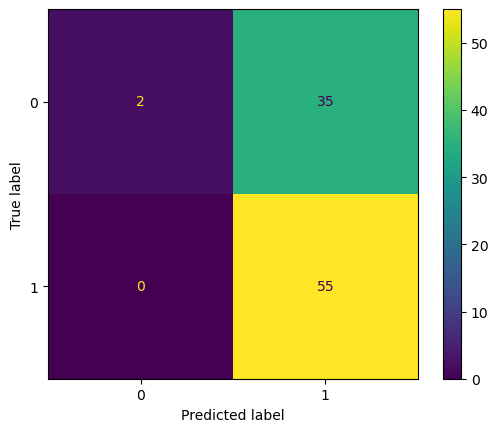

In [10]:
#docs_infra: no_execute

cm=confusion_matrix(y_train_Normalizado, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [11]:
modelito.save('modelos/modelito0503')  # creates a HDF5 file 'my_model.h5'
# model.save_weights('modelos/model/model.h5')

INFO:tensorflow:Assets written to: modelos/modelito0503/assets


INFO:tensorflow:Assets written to: modelos/modelito0503/assets


In [12]:
#tf.keras.models.save_model(modelito, 'modelos/modelito')